# Шаг 1. Загружаем данные. Выполняем предобработку.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cost_data = pd.read_csv('/datasets/costs.csv')
order_data = pd.read_csv('/datasets/orders_log.csv')
visit_data = pd.read_csv('/datasets/visits_log.csv')

print('КОЛИЧЕСТВО ПРОПУСКОВ В cost_data')
for i in cost_data.columns:
    print('Число пропущенных значений в столбце ', i, ' = ', cost_data[i].isnull().sum())
    
print()
print(cost_data.info())

print('КОЛИЧЕСТВО ПРОПУСКОВ В order_data')
for i in order_data.columns:
    print('Число пропущенных значений в столбце ', i, ' = ', order_data[i].isnull().sum())
    
print()
print(order_data.info())

print('КОЛИЧЕСТВО ПРОПУСКОВ В visit_data')
for i in visit_data.columns:
    print('Число пропущенных значений в столбце ', i, ' = ', visit_data[i].isnull().sum())
    
print()
print(visit_data.info())

КОЛИЧЕСТВО ПРОПУСКОВ В cost_data
Число пропущенных значений в столбце  source_id  =  0
Число пропущенных значений в столбце  dt  =  0
Число пропущенных значений в столбце  costs  =  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
КОЛИЧЕСТВО ПРОПУСКОВ В order_data
Число пропущенных значений в столбце  Buy Ts  =  0
Число пропущенных значений в столбце  Revenue  =  0
Число пропущенных значений в столбце  Uid  =  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
КОЛИЧЕСТВО ПРОПУСКОВ В visit_data
Число пропущенных значений в столбце  Uid  

In [2]:
visit_data.head(5)

,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


1. Приведем все даты к формату datetime.
2. Переименуем столбцы для простоты дальнейшего использования.

In [3]:
cost_data['dt'] =  pd.to_datetime(cost_data['dt'], format = '%Y-%m-%d')

visit_data['End Ts'] =  pd.to_datetime(visit_data['End Ts'], format = '%d.%m.%Y %H:%M', errors='coerce')
visit_data['Start Ts'] =  pd.to_datetime(visit_data['Start Ts'], format = '%d.%m.%Y %H:%M', errors='coerce')


order_data['Buy Ts'] =  pd.to_datetime(order_data['Buy Ts'], format = '%Y-%m-%d %H:%M:%S')

cost_data.columns = ['source_id', 'date', 'costs']
visit_data.columns = ['uid', 'device', 'end_ts', 'source_id', 'start_ts']
order_data.columns =['buy_ts', 'revenue', 'uid']

In [4]:
cost_data.head(5)

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [5]:
visit_data.head(5)

,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00


In [6]:
order_data.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


## Заключение шага 1:
На данном этапе мы проверили, что пропусков в данных нет. Заменили тип данных там, где это требовалось. Таким образом, мы можем продолжить работу над проектом.

# Шаг 2. Строим  отчеты и рассчитываем метрики по данным о продукте!

## 2.1 Сколько людей пользуются в день, неделю, месяц?

In [7]:
try:
    visit_data['day'] = visit_data['start_ts'].dt.day
    visit_data['week'] = visit_data['start_ts'].dt.week
    visit_data['month'] = visit_data['start_ts'].dt.month
    visit_data['year'] = visit_data['start_ts'].dt.year
except:
    pass


visit_per_day =  visit_data.groupby(['year', 'day']).agg({'uid':['nunique', 'count']})
print(visit_per_day.mean())
print()
visit_per_day.head(10)

uid  nunique    5193.580645
     count      5782.774194
dtype: float64



uid      
         nunique count
year day              
2017 1      5153  5749
     2      4998  5506
     3      5320  5840
     4      5433  5981
     5      5863  6508
     6      6091  6793
     7      6146  6818
     8      5826  6400
     9      5383  5960
     10     5298  5870

In [8]:
visit_per_day_2017 =  visit_data.query('year == 2017').groupby(['year', 'day']).agg({'uid':['nunique', 'count']})
print(visit_per_day_2017.mean())
print()

visit_per_day_2018 =  visit_data.query('year == 2018').groupby(['year', 'day']).agg({'uid':['nunique', 'count']})
print(visit_per_day_2018.mean())


uid  nunique    5675.129032
     count      6319.935484
dtype: float64

uid  nunique    4712.032258
     count      5245.612903
dtype: float64


## Вывод: 
    
    B среднем ежедневно количество уникальных посетителей составляет около 6200 человек, а общее число посещений - 7170.

    Более того, отмечается снижение числа посещений в 2018 году в сравнении с 2017 года. Тем не менее, такое распределение может быть связано с тем, что число наблюдений в 2017 году больше, чем в 2018 году (8 месяцев в 2017 г. против 5 месяцев в 2018 году) - на летний период, возможно, приходится рост активности пользователей.

In [9]:
visit_per_week =  visit_data.groupby(['year', 'week']).agg({'uid':['nunique', 'count']})
print(visit_per_week.mean())
print()
visit_per_week.head(5)

uid  nunique    5716.245283
     count      6764.754717
dtype: float64



uid      
          nunique count
year week              
2017 22      2021  2298
     23      4129  4901
     24      2812  3209
     25      2878  3263
     26      3064  3505

In [10]:
visit_per_week_2017 =  visit_data.query('year == 2017').groupby(['year', 'week']).agg({'uid':['nunique', 'count']})
print(visit_per_week_2017.mean())
print()

visit_per_week_2018 =  visit_data.query('year == 2018').groupby(['year', 'week']).agg({'uid':['nunique', 'count']})
print(visit_per_week_2018.mean())



uid  nunique    5341.580645
     count      6319.935484
dtype: float64

uid  nunique    6244.181818
     count      7391.545455
dtype: float64


## Вывод:  

    B среднем в 2017 году еженедельно количество уникальных посетителей составляет около 5300 человек, а общее число посещений - 6300.

    В  среднем в 2018 году еженедельно количество уникальных посетителей составляет около 6200 человек, а общее число посещений - 7390.


In [11]:
visit_per_month =  visit_data.groupby(['year', 'month']).agg({'uid':['nunique', 'count']})
print(visit_per_month.mean())
print()
visit_per_month.head(10)

uid  nunique    23228.416667
     count      29877.666667
dtype: float64



uid       
           nunique  count
year month               
2017 6       13259  16443
     7       14183  17763
     8       11631  14318
     9       18975  23839
     10      29692  37789
     11      32797  43868
     12      31557  41898
2018 1       28716  36868
     2       28749  37104
     3       27473  35576

In [12]:
visit_per_month_2017 =  visit_data.query('year == 2017').groupby(['year', 'month']).agg({'uid':['nunique', 'count']})
print(visit_per_month_2017.mean())
print()

visit_per_month_2018 =  visit_data.query('year == 2018').groupby(['year', 'month']).agg({'uid':['nunique', 'count']})
print(visit_per_month_2018.mean())




uid  nunique    21727.714286
     count      27988.285714
dtype: float64

uid  nunique    25329.4
     count      32522.8
dtype: float64


,year,month,uid,dau_av,date
0,2017,6,16443,548.1,2017-6
1,2017,7,17763,573.0,2017-7
2,2017,8,14318,461.9,2017-8
3,2017,9,23839,794.6,2017-9
4,2017,10,37789,1219.0,2017-10
5,2017,11,43868,1462.3,2017-11
6,2017,12,41898,1351.5,2017-12
7,2018,1,36868,1189.3,2018-1
8,2018,2,37104,1325.1,2018-2
9,2018,3,35576,1147.6,2018-3


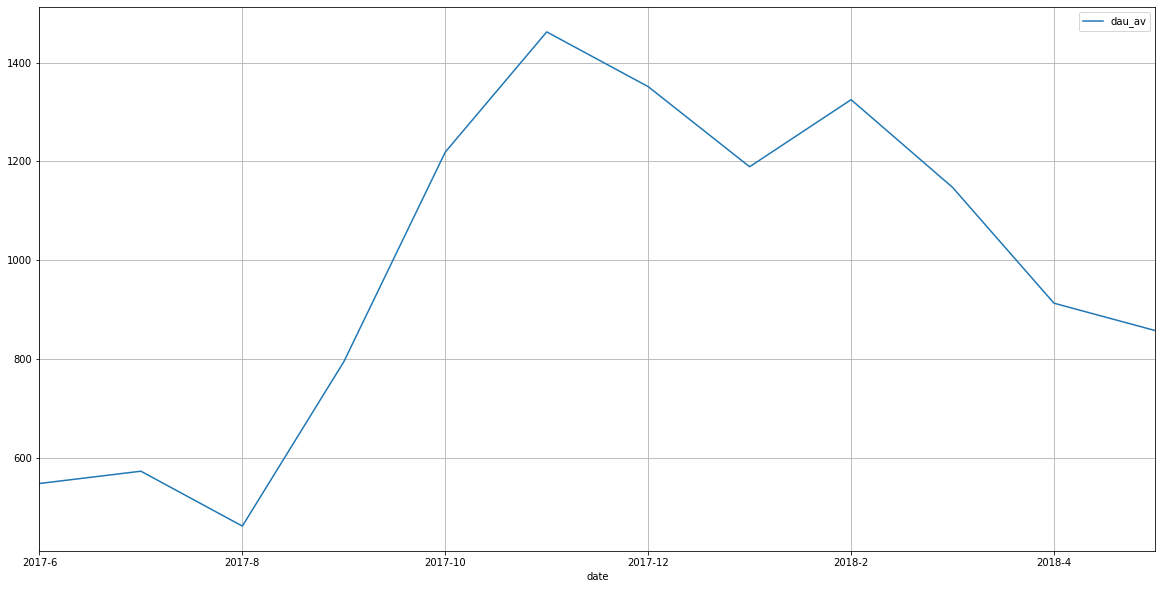

In [13]:
month_dau = visit_data.pivot_table(index = ['year', 'month'], values = 'uid', aggfunc = 'count')

month_dau

days = visit_data.pivot_table(index = ['year', 'month'], values = 'day', aggfunc = 'nunique')
days = days.drop(['month', 'year'], axis = 1)

month_dau['dau_av'] = (month_dau['uid'] / days['day']).round(1)


month_dau = month_dau.reset_index()
month_dau['date'] = month_dau['year'].astype(str) + '-' + month_dau['month'].astype(str)
ax = month_dau.plot(x = 'date', y = 'dau_av', figsize=(20, 10), grid = True)

month_dau

### Вывод:

В среднем ежедневно количество уникальных посетителей составляет около 6200 человек, а общее число посещений - 7170.

Более того, отмечается снижение числа посещений в 2018 году в сравнении с 2017 года. Тем не менее, такое распределение может быть связано с тем, что число наблюдений в 2017 году больше, чем в 2018 году (8 месяцев в 2017 г. против 5 месяцев в 2018 году) - на летний период, возможно, приходится рост активности пользователей.

В среднем в 2017 году еженедельно количество уникальных посетителей составляет около 5300 человек, а общее число посещений - 6300.

В  среднем в 2018 году еженедельно количество уникальных посетителей составляет около 6200 человек, а общее число посещений - 7390.

В 2017 году количество уникальных посетителей составляло 21727 человек, а в 2018 - 25329 человек.

Согласно построенному графику, максмальное среднее DAU фиксировалось в период с ноября 2017 по февраль 2018 года. С марта 2018 года отмечается спад посещаемости. 


## 2.2 Сколько сессий в день?

In [14]:
sessions_date = visit_data.groupby(['year', 'month', 'day']).agg({'uid':'count'})

print('Mean = ', sessions_date['uid'].mean())

print()
sessions_date.head(5)



Mean =  984.978021978022



uid
year month day     
2017 6     1    661
           2    653
           3    476
           4    508
           5    887

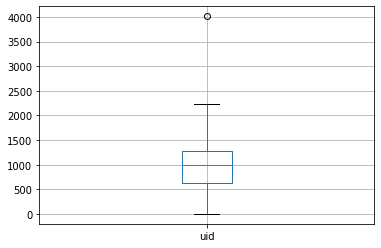

In [15]:
sessions_date.boxplot()

,year,month,uid,dau_av,date
0,2017,6,13259,442.0,2017-6
1,2017,7,14183,457.5,2017-7
2,2017,8,11631,375.2,2017-8
3,2017,9,18975,632.5,2017-9
4,2017,10,29692,957.8,2017-10
5,2017,11,32797,1093.2,2017-11
6,2017,12,31557,1018.0,2017-12
7,2018,1,28716,926.3,2018-1
8,2018,2,28749,1026.8,2018-2
9,2018,3,27473,886.2,2018-3


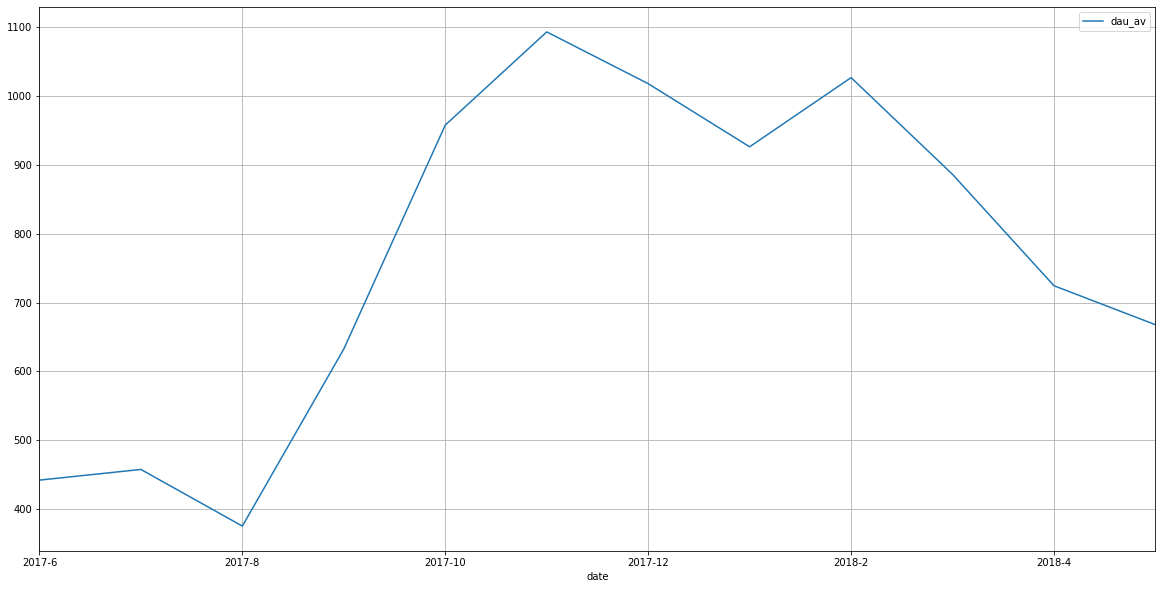

In [16]:
month_dau_s = visit_data.pivot_table(index = ['year', 'month'], values = 'uid', aggfunc = 'nunique')


days = visit_data.pivot_table(index = ['year', 'month'], values = 'day', aggfunc = 'nunique')
days = days.drop(['month', 'year'], axis = 1)

month_dau_s['dau_av'] = (month_dau_s['uid'] / days['day']).round(1)
month_dau_s = month_dau_s.drop(['month', 'year'], axis = 1)

month_dau_s = month_dau_s.reset_index()
month_dau_s['date'] = month_dau_s['year'].astype(str) + '-' + month_dau_s['month'].astype(str)
ax = month_dau_s.plot(x = 'date', y = 'dau_av', figsize=(20, 10), grid = True)

month_dau_s

## Вывод:
    
В  среднем ежедневно проект посещают 980 пользователей. Тем не менее, при анализе гистограммы мы можем отметить, что ежедневное число пользователей варьируется в пределах от 550 до 1300 пользователей!

Согласно построенному графику, максмальное количество сессий фиксировалось в период с ноября 2017 по февраль 2018 года. С марта 2018 года отмечается спад. Максимальное число сессий  составляло от 950 до 1100 ежедневно.

## 2.3 Сколько длится одна сессия?

Средняя длительности сессии =  10.742274050851806
Медиана длительности сессии =  5.0
Мода длительности сессии =  0    1.0
dtype: float64


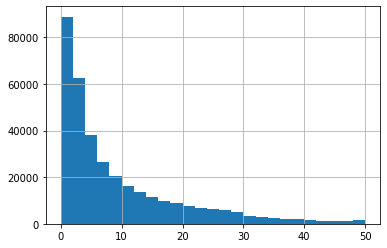

In [17]:
visit_data['session_length'] = (visit_data['end_ts'] - visit_data['start_ts']) / np.timedelta64(1, 'm')


visit_data['session_length'].hist(bins = 25, range = (0, 50))

print('Средняя длительности сессии = ',visit_data['session_length'].mean())
print('Медиана длительности сессии = ',visit_data['session_length'].median())     
print('Мода длительности сессии = ',visit_data['session_length'].mode()) 

(0, 40)

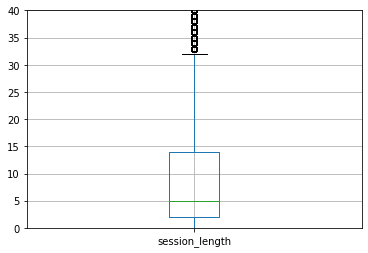

In [18]:
ax = visit_data.boxplot('session_length')
ax.set_ylim(0, 40)


Мода длительности сессии =  0    4.0
dtype: float64


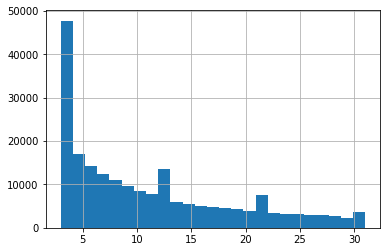

In [19]:
mean_session = visit_data.query('session_length > 2 and session_length < 32')
mean_session['session_length'].hist(bins = 25)

print('Мода длительности сессии = ', mean_session.query('session_length > 3 and session_length < 12')['session_length'].mode())

Средняя длительности сессии =  10.742274050851806
Медиана длительности сессии =  5.0
Мода длительности сессии =  0    1.0
dtype: float64


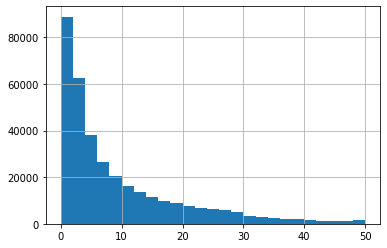

In [20]:
visit_data['session_length'].hist(bins = 25, range = (0, 50))

print('Средняя длительности сессии = ',visit_data['session_length'].mean())
print('Медиана длительности сессии = ',visit_data['session_length'].median())     
print('Мода длительности сессии = ',visit_data['session_length'].mode()) 

## Вывод: 

В среднем одна сессия длится от 3 до 14 минут. Наибольшее число сессий длительностью от 2 до 5 минут.
    
Мода длительности сессии составляет  1 минута.

## 2.4 Как часто люди возвращаются?

На данном этапе мы рассчитываем Retantion Rate. Для большей наглядности мы будем  использовать HeatMap!

In [21]:
visit_data.head(5)

,uid,device,end_ts,source_id,start_ts,day,week,month,year,session_length
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,20,51,12,2017,18.0
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,19,8,2,2018,28.0
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,1,26,7,2017,0.0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,20,20,5,2018,24.0
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,27,52,12,2017,0.0


In [22]:
first_activity_data = visit_data.groupby(['uid'])['start_ts'].min()
first_activity_data.name = 'first_activity'
visit_data = visit_data.join(first_activity_data, on =  'uid')


In [23]:
visit_data['activity_week'] = pd.to_datetime(visit_data['start_ts'], unit='d') - pd.to_timedelta(visit_data['start_ts'].dt.dayofweek, unit='d')
visit_data['first_activity_week'] = pd.to_datetime(visit_data['first_activity'], unit='d') - pd.to_timedelta(visit_data['first_activity'].dt.dayofweek, unit='d')

visit_data['cohort_lifetime'] = visit_data['activity_week'] - visit_data['first_activity_week']
visit_data['cohort_lifetime'] = visit_data['cohort_lifetime'] / np.timedelta64(1,'M')
visit_data['cohort_lifetime'] = visit_data['cohort_lifetime'].astype(int)





In [24]:
visit_data['first_activity_week'] = pd.to_datetime(visit_data['first_activity_week']).dt.date
cohorts = visit_data.groupby(['first_activity_week','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','uid']]

inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(inital_users_count,on='first_activity_week')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum')

retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_week,,,,,,,,,,,,
2017-05-29,1.0,0.087086,0.081148,0.084612,0.092528,0.108362,0.082632,0.071252,0.086591,0.070757,0.060366,0.065809
2017-06-05,1.0,0.059584,0.059331,0.073783,0.061359,0.077840,0.055020,0.054260,0.062120,0.044625,0.042089,0.049189
2017-06-12,1.0,0.052591,0.064277,0.056486,0.054538,0.074016,0.051422,0.051032,0.059213,0.045189,0.035450,0.026490
2017-06-19,1.0,0.039458,0.051064,0.054932,0.053772,0.062282,0.049516,0.043327,0.048356,0.034429,0.030561,0.015474
2017-06-26,1.0,0.039382,0.054104,0.051159,0.050791,0.051527,0.046743,0.042326,0.042326,0.025764,0.027604,0.009569
2017-07-03,1.0,0.044184,0.055230,0.050397,0.059027,0.059372,0.036935,0.040041,0.037625,0.027270,0.021747,NaN
2017-07-10,1.0,0.041764,0.053437,0.047471,0.050324,0.047471,0.037354,0.043061,0.029572,0.025422,0.023346,NaN
2017-07-17,1.0,0.054169,0.061777,0.057517,0.055082,0.052952,0.052648,0.048387,0.044127,0.021911,0.012781,NaN
2017-07-24,1.0,0.059908,0.066820,0.054378,0.044240,0.045161,0.043318,0.032719,0.028111,0.019816,0.004608,NaN


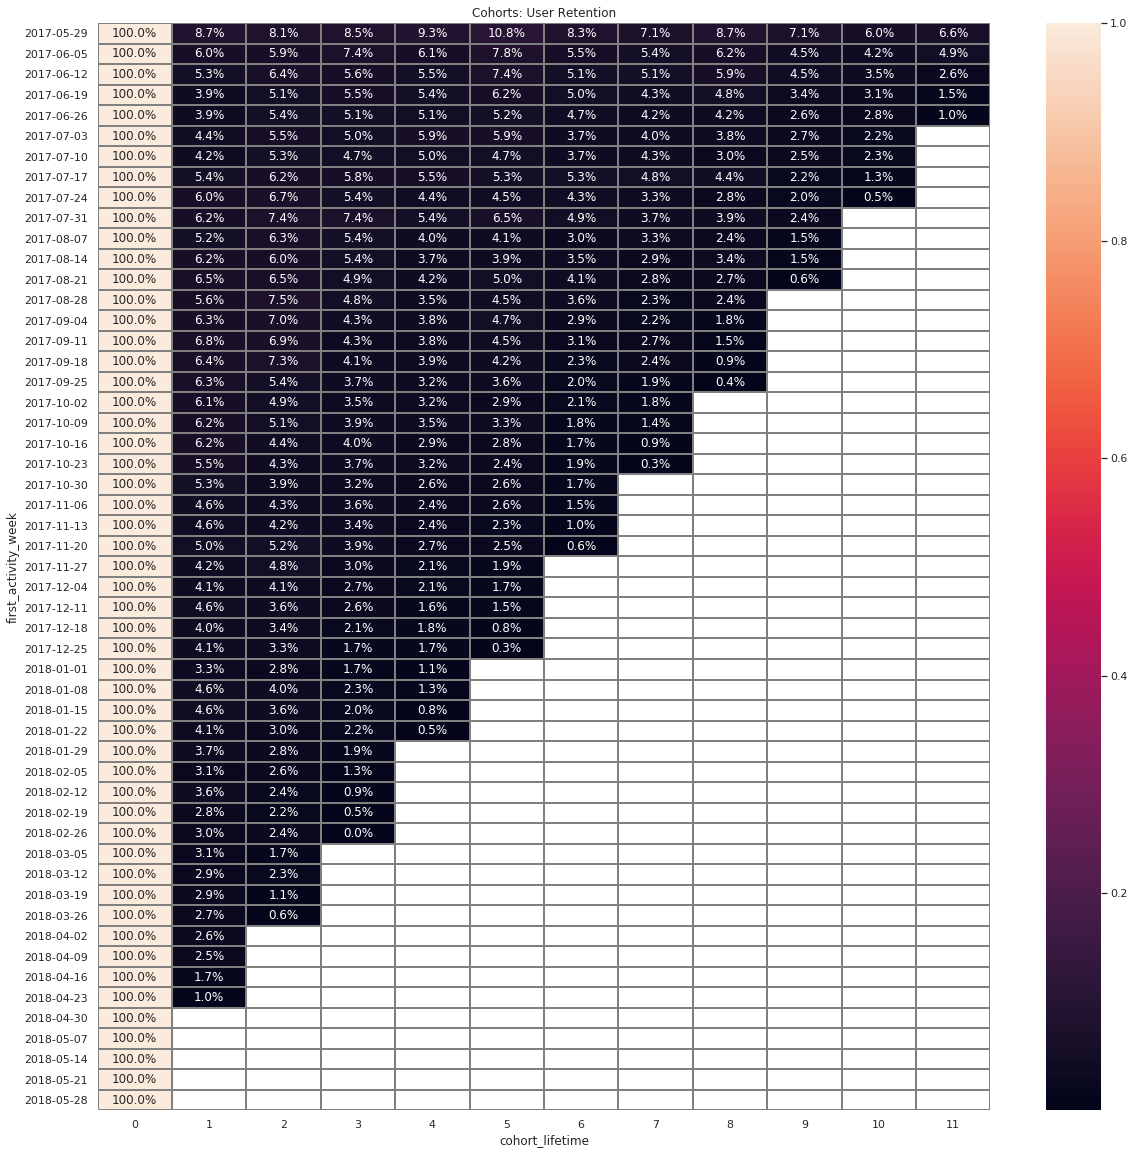

In [25]:
import seaborn as sns

sns.set(style='white')
plt.figure(figsize=(20, 20))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

### Вывод:

Как мы можем заметить благодаря "тепловой карте" лишь каждый двадцатый возвращается через неделю (до 2017-10-30), после указанной даты Retention Rate падает до 1%. Тем не менее, следует отметить, что в будущем подавляющее число пользователей начинают пользоваться сервисом постоянно, однако в 2018 году подобная закономерность не сохраняется.

>**_<span style="color:green">Отличный когортный анализ!</span>_**


# Раздел 3. Аналитика продаж.

## Вопрос 3.1 Когда люди начинают покупать?

In [26]:
order_data1 = order_data.copy()

order_data1 = order_data1.join(first_activity_data, on = 'uid')

order_data1.head(5)

,buy_ts,revenue,uid,first_activity
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


In [27]:
order_data1['time_delta_min'] = (order_data1['buy_ts'] - order_data1['first_activity']) / np.timedelta64(1, 'm')
order_data1['time_delta_hours'] = (order_data1['buy_ts'] - order_data1['first_activity']) / np.timedelta64(1, 'h')
order_data1['time_delta_days'] = (order_data1['buy_ts'] - order_data1['first_activity']) / np.timedelta64(1, 'D')

order_data1.describe()

,revenue,uid,time_delta_min,time_delta_hours,time_delta_days
count,50415.000000,5.041500e+04,50415.000000,50415.000000,50415.000000
mean,4.999647,9.098161e+18,53324.043281,888.734055,37.030586
std,21.818359,5.285742e+18,101676.327026,1694.605450,70.608560
min,0.000000,3.135781e+14,-1381.000000,-23.016667,-0.959028
25%,1.220000,4.533567e+18,6.000000,0.100000,0.004167
50%,2.500000,9.102274e+18,190.000000,3.166667,0.131944
75%,4.890000,1.368290e+19,55282.500000,921.375000,38.390625
max,2633.280000,1.844617e+19,524669.000000,8744.483333,364.353472


На данном этапе мы можем видеть, что пользователи могут сделать первый заказ как через несколько минут, так и через несколько дней. Именно по этой причине мы рассчитываем показатель time_delta для  минут, часов и дней. 

Кроме того, мы исключаем данные с отрицательным показателем time_delta. Такой показатель может быть получен при неправильной работе счетчика. Рекомендуется отправить баг-репорт сотрудникам, которые ответственны за сбор данных.

Рассчет времени мы будем проводить в несколько этапов для дней и минут с указанием процента от общего количества пользователей.

Процент пользователей, которые делают заказ в первые сутки:  48.47529136555412 %


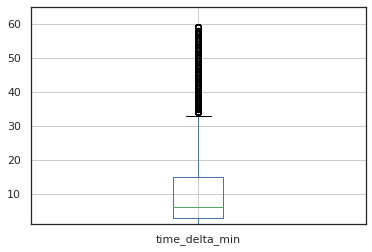

In [28]:
ax1 = order_data1.query('0 < time_delta_min < 60').boxplot('time_delta_min')
ax1.set_ylim(1, 65)

print('Процент пользователей, которые делают заказ в первые сутки: ', 
      order_data1.query('time_delta_min < 60')['time_delta_min'].count() / order_data1.query('time_delta_min > 0')['time_delta_min'].count()*100,
     '%')

В среднем 43% пользователей делают заказ  в течении первого часа. Среднее время составляет от 2 минут до 32 минут.

Процент пользователей, которые делают заказ в первые сутки (в часах):  10.16959772755754 %


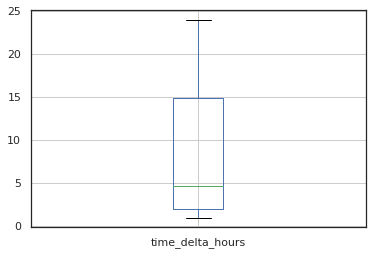

In [29]:
ax1 = order_data1.query('1 < time_delta_hours < 24').boxplot('time_delta_hours')

print('Процент пользователей, которые делают заказ в первые сутки (в часах): ', 
      order_data1.query('1 < time_delta_hours < 24')['time_delta_hours'].count() / order_data1.query('time_delta_hours > 0')['time_delta_hours'].count()*100,
     '%')

Около 10% пользователей делают заказв первые сутки в срок более одного часа от первого посещения. Среднее время составляет от 1 часа до 15 часов.

Процент пользователей, которые делают заказ (в днях):  46.57671581937424 %


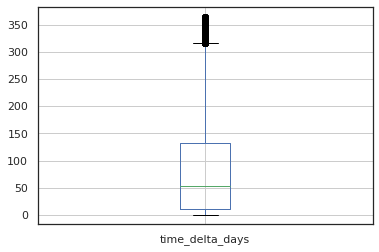

In [30]:
ax1 = order_data1.query('1 < time_delta_days').boxplot('time_delta_days')

print('Процент пользователей, которые делают заказ (в днях): ', 
      order_data1.query('1 < time_delta_days')['time_delta_days'].count() / order_data1.query('time_delta_days > 0')['time_delta_days'].count()*100,
     '%')

Около 46% пользователей делают заказ в срок более одного дня от первого посещения. Среднее время составляет от 1 дня до 130 дней.

## Вывод:
В среднем 43% пользователей делают заказ в течении первого часа. Среднее время составляет от 2 минут до 32 минут.

Около 10% пользователей делают заказв первые сутки в срок более одного часа от первого посещения. Среднее время составляет от 1 часа до 15 часов.

Около 46% пользователей делают заказ в срок более одного дня от первого посещения. Среднее время составляет от 1 дня до 130 дней.

## Вопрос 3.2 Сколько раз покупают за период?

В данном разделе проводим аналитику продаж по неделям путем проведения когортного анализа.

In [31]:
order_data2 = order_data.copy()

order_data2 = order_data2.join(first_activity_data, on = 'uid')

order_data2['time_to_buy'] = (order_data2['buy_ts'] - order_data2['first_activity'])
filtered_events = order_data2[order_data2['time_to_buy'] < '30 days']
count_events_by_users = filtered_events.groupby(['uid']).agg({'buy_ts':'count'}).reset_index()

count_events_by_users['buy_ts'] = count_events_by_users['buy_ts'] > 1

user_ids_with_target_behavior = count_events_by_users['uid'].count()
user_ids_with_target_behavior

31559

In [32]:
order_data2['buy_month'] = pd.to_datetime(order_data2['buy_ts'].dt.date) - pd.to_timedelta(order_data2['buy_ts'].dt.dayofweek, unit='d')
order_data2['min_buy_month'] = pd.to_datetime(order_data2['first_activity'].dt.date) - pd.to_timedelta(order_data2['first_activity'].dt.dayofweek, unit='d')

order_data2['cohort_lifetime'] = order_data2['buy_month'] - order_data2['min_buy_month']
order_data2['cohort_lifetime'] = order_data2['cohort_lifetime'] / np.timedelta64(1,'M')
order_data2['cohort_lifetime'] = order_data2['cohort_lifetime'].astype(int)

buy_amount = order_data2.pivot_table(index = 'min_buy_month', columns = 'cohort_lifetime', values = 'uid', aggfunc = 'nunique')

buy_amount



cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
min_buy_month,,,,,,,,,,,,
2017-05-29,359.0,32.0,32.0,42.0,55.0,62.0,48.0,40.0,46.0,37.0,29.0,40.0
2017-06-05,822.0,52.0,49.0,81.0,58.0,72.0,55.0,46.0,70.0,32.0,31.0,61.0
2017-06-12,310.0,25.0,35.0,30.0,25.0,30.0,21.0,25.0,34.0,25.0,21.0,22.0
2017-06-19,331.0,13.0,26.0,38.0,27.0,31.0,22.0,22.0,29.0,14.0,19.0,10.0
2017-06-26,392.0,21.0,40.0,37.0,33.0,31.0,22.0,25.0,27.0,14.0,15.0,2.0
2017-07-03,395.0,16.0,35.0,21.0,29.0,38.0,18.0,38.0,27.0,20.0,9.0,NaN
2017-07-10,511.0,44.0,46.0,33.0,48.0,47.0,38.0,35.0,31.0,15.0,24.0,NaN
2017-07-17,528.0,37.0,60.0,34.0,41.0,33.0,33.0,41.0,23.0,17.0,5.0,NaN
2017-07-24,249.0,27.0,31.0,14.0,17.0,18.0,16.0,14.0,13.0,4.0,3.0,NaN


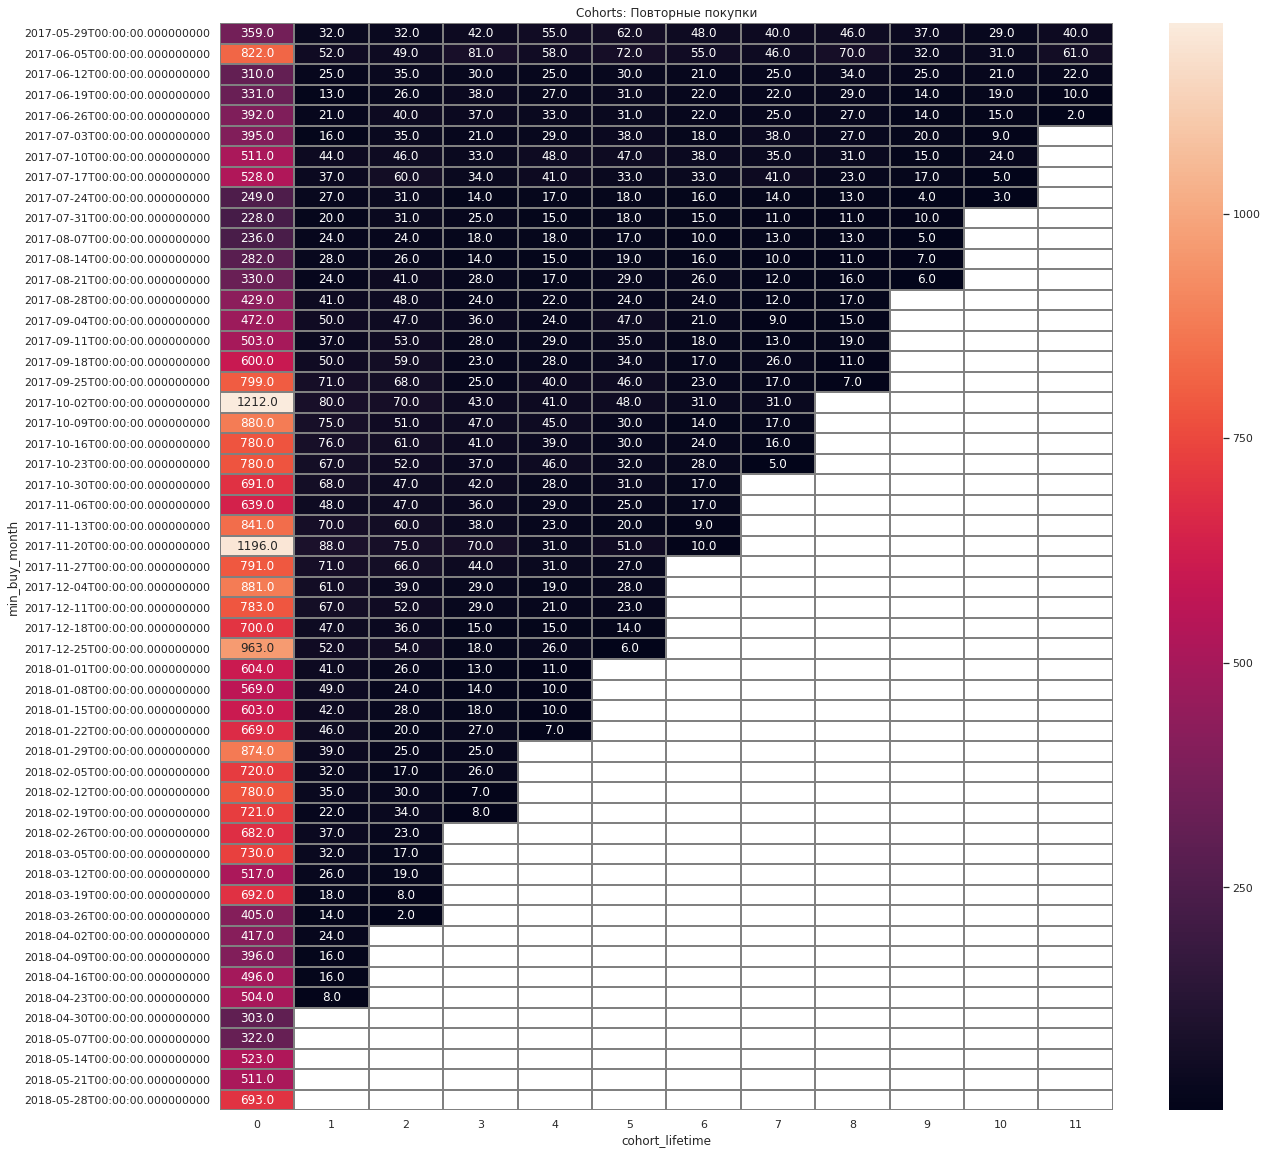

In [33]:

sns.set(style='white')
plt.figure(figsize=(20, 20))
plt.title('Cohorts: Повторные покупки')
sns.heatmap(buy_amount, annot=True, fmt='', linewidths=1, linecolor='gray');

## Вывод:

Благодаря тепловой карте мы можем сделать  вывод, что в последующие месяцы покупает лишь каждый 10-12 пользователь. В следующие месяцы число повторных заказов уменьшается, что позволяет сделать вывод, что удержание пользователей остается  на низком уровне. 

Тем не менее, в определенные месяцы отмечается существенное повышение активности (н-р, когорта 2), что может объясняться проведением массовых мероприятий. В  таком случае клиенты охотно пользуются сервисом повторно.

## Какой средний чек?

Для более глубокого анализа мы будем рассчитывать средний чек по месяцам.

In [34]:
order_data3 = order_data.copy()

order_data3['buy_month'] = pd.to_datetime(order_data3['buy_ts'].dt.date) - pd.to_timedelta(order_data3['buy_ts'].dt.dayofweek, unit='d')
order_data3['buy_month'] = order_data3['buy_month'].dt.to_period('M')



In [35]:
order_data3.head(5)

,buy_ts,revenue,uid,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-05
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-05
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-05
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-05
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-05


In [36]:
mean_check = order_data3.pivot_table(index = 'buy_month', values = 'revenue', aggfunc = ['sum', 'count']).reset_index()
mean_check.columns = ['buy_month', 'sum', 'amount']

mean_check['mean_check'] = mean_check['sum'] / mean_check['amount']
mean_check

,buy_month,sum,amount,mean_check
0,2017-05,1075.26,340,3.162529
1,2017-06,8952.00,2112,4.238636
2,2017-07,13311.82,2524,5.274097
3,2017-08,8550.48,1785,4.790185
4,2017-09,17739.86,3270,5.425034
5,2017-10,30802.92,6267,4.915098
6,2017-11,26157.62,5457,4.793407
7,2017-12,34057.52,5712,5.962451
8,2018-01,23437.03,5509,4.254317
9,2018-02,24996.24,5239,4.771185


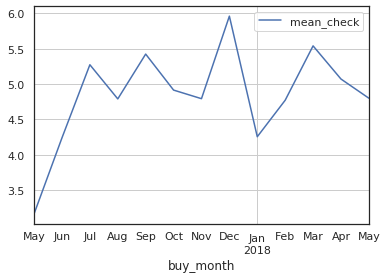

In [37]:
mean_check.plot(x = 'buy_month', y = 'mean_check', grid = True)

## Вывод:

Средний чек варьируется в пределах от 3.1 (в первый месяц работы сервиса) до 5.5. условных единиц. С начала 2018 года отмечается  рост среднего чека. Максимальный средний чек был в декабре с последующим падением в январе, что может объясняться новогодними праздниками.

# Сколько денег приносят? (LTV)

In [38]:
order_data5 = order_data.copy()



first_orders = order_data5.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy']
first_orders['first_buy'] = first_orders['first_buy'].astype('datetime64[M]')#.dt.to_period('D')
order_data5 = order_data5.merge(first_orders, on = 'uid')

order_data5 = order_data5.join(first_activity_data, on = 'uid')

order_data5['first_activity'] = order_data5['first_activity'].astype('datetime64[M]')#.dt.to_period('D')
order_data5['buy_month'] = order_data5['buy_ts'].astype('datetime64[M]')#.dt.to_period('D')



order_data5.head(5)


,buy_ts,revenue,uid,first_buy,first_activity,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [39]:
cohorts = order_data5.groupby(['first_buy','buy_month']).agg({'revenue': 'sum'}).reset_index()

cohort_sizes = first_orders.groupby('first_buy').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy', 'n_buyers']

report = pd.merge(cohort_sizes, cohorts, on='first_buy')

report['age'] =  (report['buy_month'] - report['first_buy']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['revenue'] / report['n_buyers']

report.head(5)

,first_buy,n_buyers,buy_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [40]:
output = report.pivot_table(
        index='first_buy', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    
output.fillna('')



age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


In [41]:
output = output.cumsum(axis=1).round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


In [43]:
for i in output.index:
    print('Итоговый LTV для когорты ', i,' = ', output.loc[i].sum().round(2))

Итоговый LTV для когорты  2017-06-01 00:00:00  =  102.35
Итоговый LTV для когорты  2017-07-01 00:00:00  =  82.29
Итоговый LTV для когорты  2017-08-01 00:00:00  =  70.62
Итоговый LTV для когорты  2017-09-01 00:00:00  =  94.6
Итоговый LTV для когорты  2017-10-01 00:00:00  =  46.96
Итоговый LTV для когорты  2017-11-01 00:00:00  =  41.39
Итоговый LTV для когорты  2017-12-01 00:00:00  =  37.63
Итоговый LTV для когорты  2018-01-01 00:00:00  =  23.1
Итоговый LTV для когорты  2018-02-01 00:00:00  =  17.71
Итоговый LTV для когорты  2018-03-01 00:00:00  =  15.44
Итоговый LTV для когорты  2018-04-01 00:00:00  =  9.85
Итоговый LTV для когорты  2018-05-01 00:00:00  =  4.66
Итоговый LTV для когорты  2018-06-01 00:00:00  =  3.42


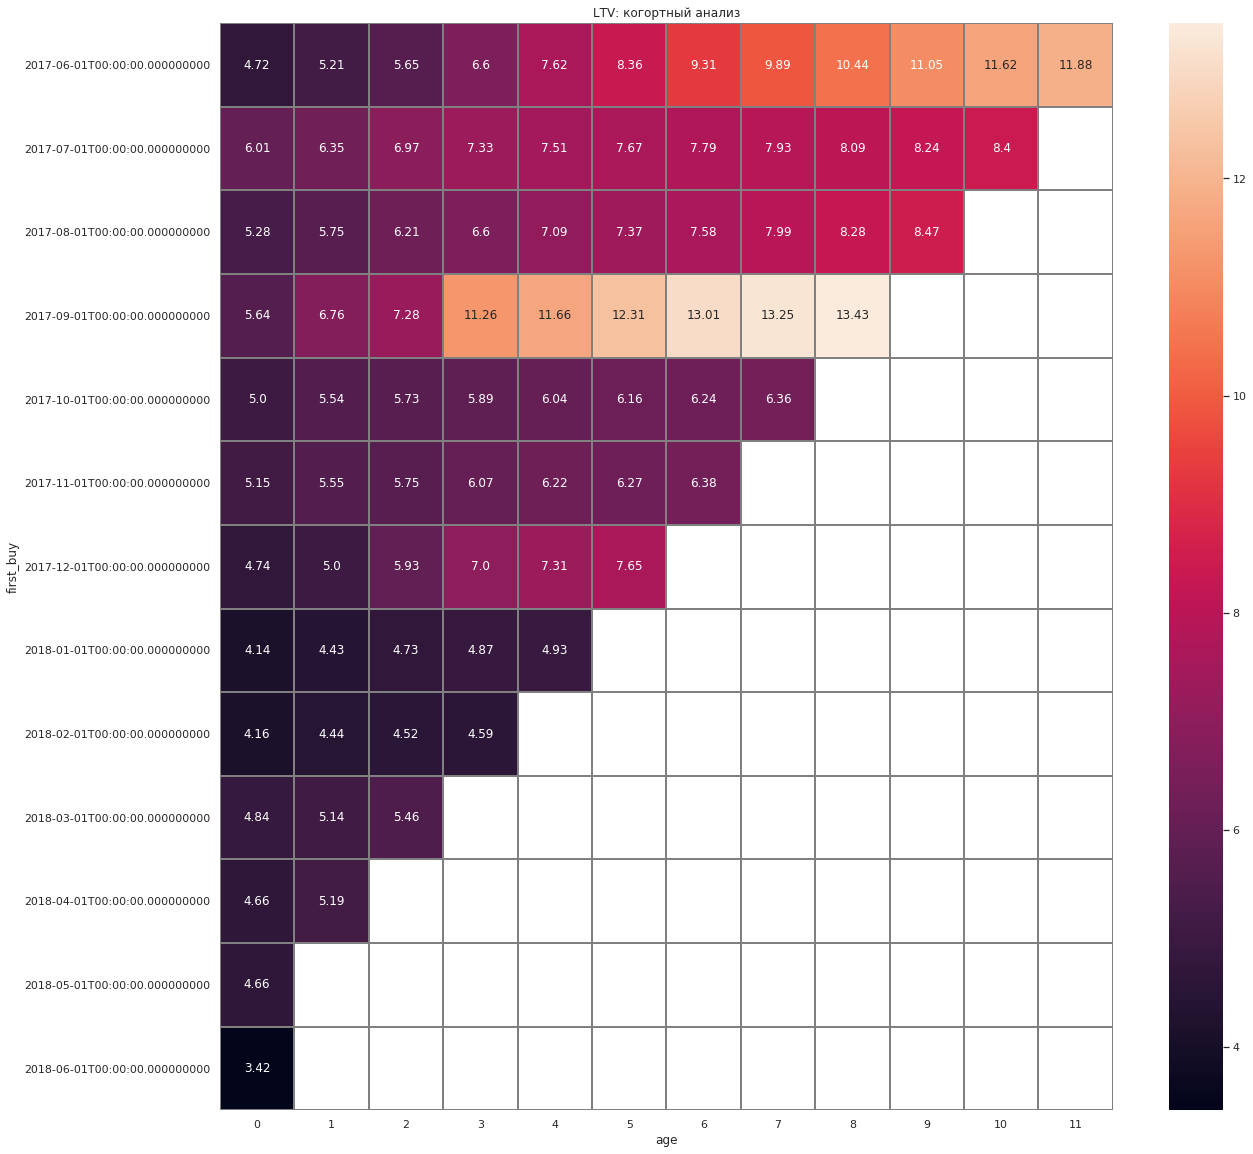

In [44]:

sns.set(style='white')
plt.figure(figsize=(20, 20))
plt.title('LTV: когортный анализ')
sns.heatmap(output, annot=True, fmt='', linewidths=1, linecolor='gray');

## Вывод: 

В среднем ежемесячно каждая когорта приносит:


<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>age</th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n      <th>3</th>\n      <th>4</th>\n      <th>5</th>\n      <th>6</th>\n      <th>7</th>\n      <th>8</th>\n      <th>9</th>\n      <th>10</th>\n      <th>11</th>\n    </tr>\n    <tr>\n      <th>first_buy</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>2017-06-01</th>\n      <td>4.72</td>\n      <td>5.21</td>\n      <td>5.65</td>\n      <td>6.6</td>\n      <td>7.62</td>\n      <td>8.36</td>\n      <td>9.31</td>\n      <td>9.89</td>\n      <td>10.44</td>\n      <td>11.05</td>\n      <td>11.62</td>\n      <td>11.88</td>\n    </tr>\n    <tr>\n      <th>2017-07-01</th>\n      <td>6.01</td>\n      <td>6.35</td>\n      <td>6.97</td>\n      <td>7.33</td>\n      <td>7.51</td>\n      <td>7.67</td>\n      <td>7.79</td>\n      <td>7.93</td>\n      <td>8.09</td>\n      <td>8.24</td>\n      <td>8.4</td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2017-08-01</th>\n      <td>5.28</td>\n      <td>5.75</td>\n      <td>6.21</td>\n      <td>6.6</td>\n      <td>7.09</td>\n      <td>7.37</td>\n      <td>7.58</td>\n      <td>7.99</td>\n      <td>8.28</td>\n      <td>8.47</td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2017-09-01</th>\n      <td>5.64</td>\n      <td>6.76</td>\n      <td>7.28</td>\n      <td>11.26</td>\n      <td>11.66</td>\n      <td>12.31</td>\n      <td>13.01</td>\n      <td>13.25</td>\n      <td>13.43</td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2017-10-01</th>\n      <td>5.00</td>\n      <td>5.54</td>\n      <td>5.73</td>\n      <td>5.89</td>\n      <td>6.04</td>\n      <td>6.16</td>\n      <td>6.24</td>\n      <td>6.36</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2017-11-01</th>\n      <td>5.15</td>\n      <td>5.55</td>\n      <td>5.75</td>\n      <td>6.07</td>\n      <td>6.22</td>\n      <td>6.27</td>\n      <td>6.38</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2017-12-01</th>\n      <td>4.74</td>\n      <td>5</td>\n      <td>5.93</td>\n      <td>7</td>\n      <td>7.31</td>\n      <td>7.65</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2018-01-01</th>\n      <td>4.14</td>\n      <td>4.43</td>\n      <td>4.73</td>\n      <td>4.87</td>\n      <td>4.93</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2018-02-01</th>\n      <td>4.16</td>\n      <td>4.44</td>\n      <td>4.52</td>\n      <td>4.59</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2018-03-01</th>\n      <td>4.84</td>\n      <td>5.14</td>\n      <td>5.46</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2018-04-01</th>\n      <td>4.66</td>\n      <td>5.19</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2018-05-01</th>\n      <td>4.66</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n    <tr>\n      <th>2018-06-01</th>\n      <td>3.42</td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n      <td></td>\n    </tr>\n  </tbody>\n</table>

Наибольшую прибыль LTV принесла когорта от 2017-09. 

Наименьшую LTV показала когорта от 2018-06, 2018-01, 2018-02.

# №4 Анализ маркетинговых показателей

## №4.1 Сколько денег потратили? Всего / на каждый источник / по времени

Всего за все время на привлечение пользователей было потрачено  329131.62


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


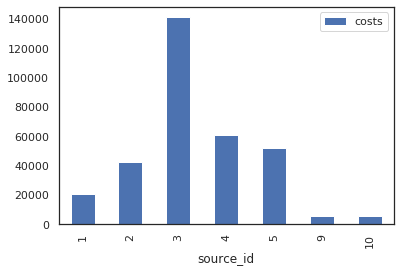

In [45]:
#Рассчет общих расходов и расходов на каждый источник

cost_data.head(4)

total_costs = cost_data.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum')

print('Всего за все время на привлечение пользователей было потрачено ', total_costs['costs'].sum().round(2))

total_costs.plot.bar()

total_costs



In [46]:
costs = cost_data.copy()
costs['month'] = costs['date'].dt.to_period('M')

month_report =  costs.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
month_report = month_report.reset_index()
month_report

source_id,month,1,2,3,4,5,9,10
0,2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
5,2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
6,2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
7,2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
8,2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88
9,2018-03,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41


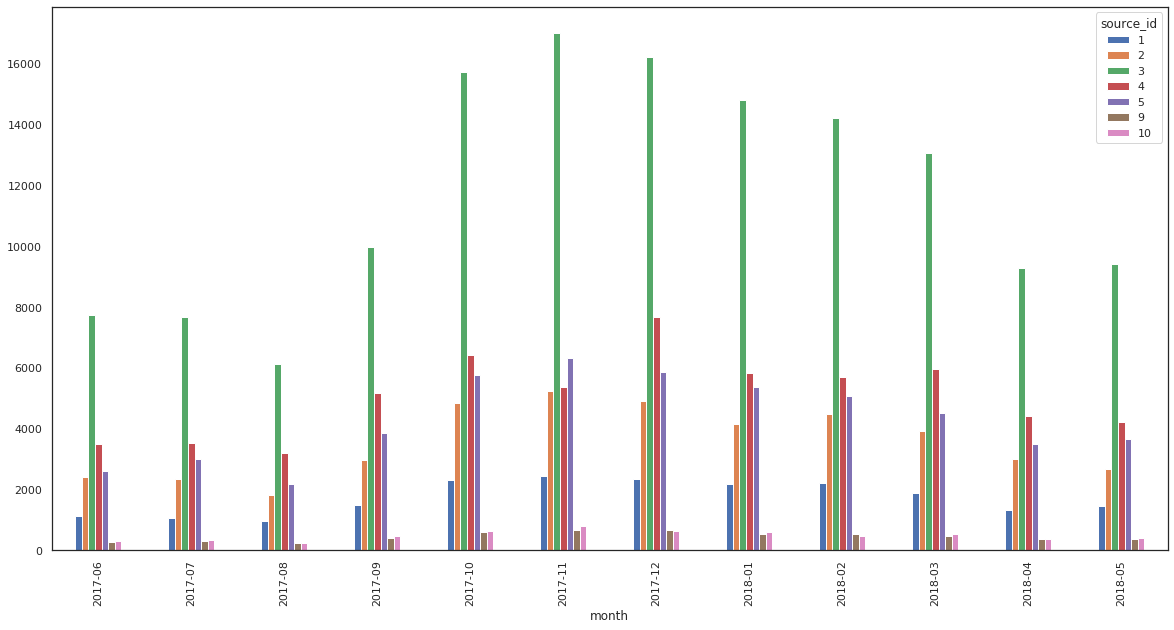

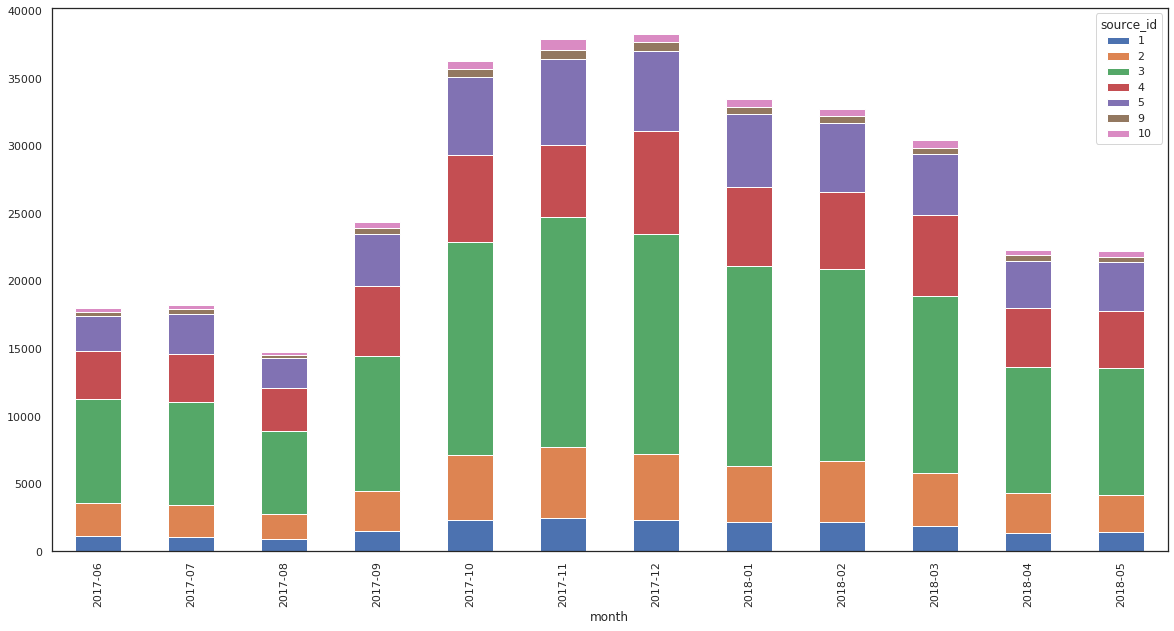

In [47]:
month_report.plot.bar(x = 'month', figsize=(20, 10))

month_report.plot.bar(x = 'month', figsize=(20, 10), stacked=True)


>**_<span style="color:green">Отличные графики!</span>_**


## Вывод:


Hаибольшее количество средств тратится на источник 3.

В среднем за все время компания понесла следующие расходы на источники трафика:

1	20833.27

2	42806.04

3	141321.63

4	61073.60

5	51757.10

9	5517.49

10	5822.49

Всего за все время на привлечение пользователей было потрачено  329131.62

Из построенного графика мы можем сделать вывод, что до 12-2017 расходы на рекламу возрастали, однако затем наблюдался спад. Больше всего средств тратилось на источник 3, 4, 5.

## №4.2 Сколько стоило привлечение одного покупателя из каждого источника?

На данном этапе мы будем проводить анализ маркетинговых расходов за год.

In [48]:
cost_data['month'] = cost_data['date'].dt.to_period('M') #рассчет затрат по месяцам
cost_data.head(5)

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [49]:
cost_data.head(5)

orders = order_data.copy()

month_report = cost_data.pivot_table(index = ['month','source_id'], values = 'costs', aggfunc = 'sum')
orders['uid'] = orders['uid'].astype(str)
orders.head(5)

visits = visit_data.copy()

visit = visits.groupby(['uid', 'source_id']).agg({'first_activity': 'min'}).reset_index()
visit = visit.drop('first_activity', axis = 1)
visit['uid'] = visit['uid'].astype(str)
visit['uid'] = visit['uid'].drop_duplicates()
visit = visit.dropna()
visit.head(5)

orders = pd.merge(orders, visit, on='uid')

orders.head(5)

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3


In [50]:
report = cost_data.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum') 
report #сводная таблица  по затратам на каждый источник трафика

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [51]:
client_source = orders.pivot_table(index = 'source_id', values = 'uid', aggfunc = 'count')
client_source #сводная таблица  по количеству покупателей из каждого источника


,uid
source_id,
1,15308
2,7468
3,11329
4,9253
5,5483
7,1
9,620
10,953


In [52]:
report = report.join(client_source['uid'], on = 'source_id', rsuffix = '_r')
report

,costs,uid
source_id,,
1,20833.27,15308
2,42806.04,7468
3,141321.63,11329
4,61073.60,9253
5,51757.10,5483
9,5517.49,620
10,5822.49,953


,costs,uid,client_cost
source_id,,,
1,20833.27,15308,1.36
2,42806.04,7468,5.73
3,141321.63,11329,12.47
4,61073.60,9253,6.60
5,51757.10,5483,9.44
9,5517.49,620,8.90
10,5822.49,953,6.11


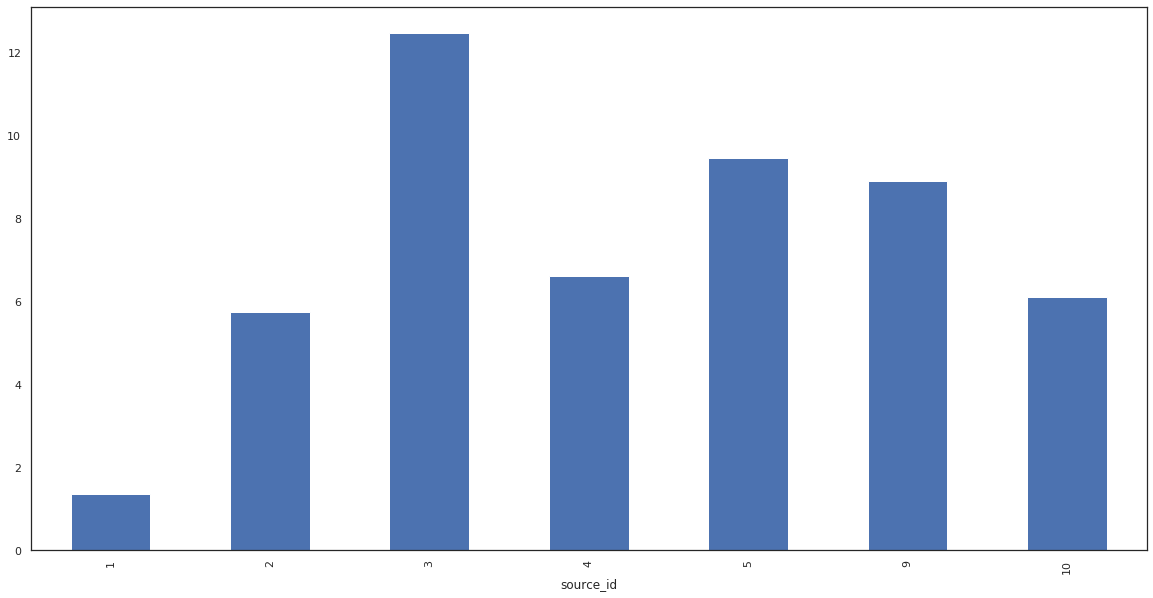

In [53]:
report['client_cost'] = (report['costs'] / report['uid']).round(2)

report['client_cost'].plot.bar( figsize=(20, 10))

report

### Вывод:

Стоимость одного пользователя в зависимости от источника составляет:

1     1.36

2     5.73

3     12.47

4     6.6

5     9.44

9     8.9

10    6.11 

, где цифра соответствует наименованию источника.

## №4.3 На сколько окупились расходы? (ROI)

In [54]:
cost_data.head(5)

orders = order_data.copy()

month_report = cost_data.pivot_table(index = ['month','source_id'], values = 'costs', aggfunc = 'sum')
orders['uid'] = orders['uid'].astype(str)
orders.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [55]:
visits = visit_data.copy()

visit = visits.groupby(['uid', 'source_id']).agg({'first_activity': 'min'}).reset_index()
visit = visit.drop('first_activity', axis = 1)
visit['uid'] = visit['uid'].astype(str)
visit['uid'] = visit['uid'].drop_duplicates()
visit = visit.dropna()
visit.head(5)

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [56]:
orders = pd.merge(orders, visit, on='uid')

orders.head(5)

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3


/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,tot_income,amount,user_cost,client_price,ROI
source_id,,,,,
1,101631.38,15308,1.36,20818.88,388.2%
2,43123.74,7468,5.73,42791.64,0.8%
3,43354.82,11329,12.47,141272.63,-69.3%
4,36705.84,9253,6.60,61069.80,-39.9%
5,22919.80,5483,9.44,51759.52,-55.7%
7,1.22,1,NaN,NaN,nan%
9,1874.18,620,8.90,5518.00,-66.0%
10,2446.22,953,6.11,5822.83,-58.0%


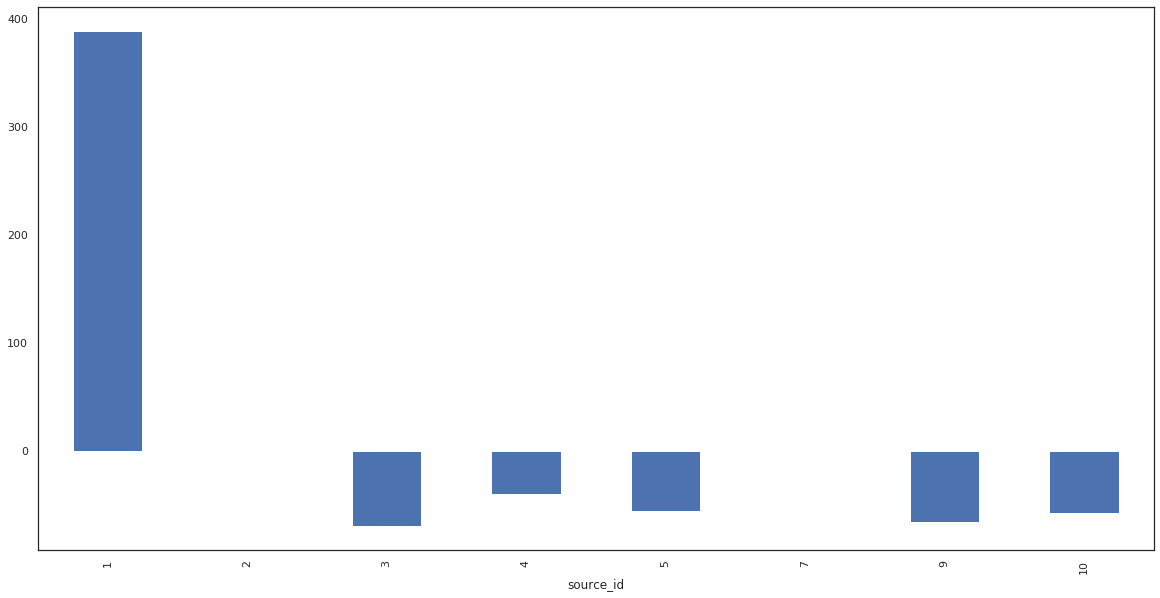

In [57]:
orders_report = orders.pivot_table(index = 'source_id', values = 'revenue', aggfunc = ['sum', 'count'])

orders_report = orders_report.join(report['client_cost'], on = 'source_id')

orders_report.columns= ['tot_income', 'amount', 'user_cost']

orders_report['client_price'] = orders_report['amount'] * orders_report['user_cost']

orders_report['ROI'] = (orders_report['tot_income'] - orders_report['client_price']) / orders_report['client_price']   * 100 
orders_report['ROI'] = orders_report['ROI'].round(1)
#

orders_report['ROI'].plot.bar( figsize=(20, 10))

orders_report['ROI'] = orders_report['ROI'].astype(str) + '%'

orders_report

# Вывод:

Согласно проведенному анализу, наибольший ROI наблюдается у источника 1. Все прочие источники привлечения клиентов показывают отрицательный ROI, т.е. компания тратит на привлечение клиентов больше, чем зарабатывает. Рекомендуется рассмотреть целесообразность использования данных маркетинговых инструментов или  изменить подход к маркетингу.

# Рассчет ROI для каждого источника

In [58]:
orders = order_data.copy()

month_report = cost_data.pivot_table(index = ['month','source_id'], values = 'costs', aggfunc = 'sum')
orders['uid'] = orders['uid'].astype(str)

visits = visit_data.copy()

visit = visits.groupby(['uid', 'source_id']).agg({'first_activity': 'min'}).reset_index()

visit['uid'] = visit['uid'].astype(str)
visit['uid'] = visit['uid'].drop_duplicates()
visit = visit.dropna()

orders = pd.merge(orders, visit, on='uid')

orders['age'] = ((orders['buy_ts'] - orders['first_activity']) / np.timedelta64(1, 'M')).round().astype(int)
orders['buy_ts'] = orders['buy_ts'].dt.to_period('M') 
orders['first_activity'] = orders['first_activity'].dt.to_period('M') 

orders = orders.query('source_id != 7') #удаляем источник 7, так как данные не информативны (всего 2 пользователя)
orders = orders.join(report['client_cost'], on = 'source_id')
orders.head(10)

,buy_ts,revenue,uid,source_id,first_activity,age,client_cost
0,2017-06,17.00,10329302124590727494,1,2017-06,0,1.36
1,2017-06,0.55,11627257723692907447,2,2017-06,0,5.73
2,2017-06,0.37,17903680561304213844,2,2017-06,0,5.73
3,2017-06,0.55,16109239769442553005,2,2017-06,0,5.73
4,2017-06,0.37,14200605875248379450,3,2017-06,0,12.47
5,2017-06,0.18,10402394430196413321,3,2017-06,0,12.47
6,2017-06,1.83,12464626743129688638,5,2017-06,0,9.44
7,2017-06,7.33,12464626743129688638,5,2017-06,0,9.44
8,2017-06,1.22,3644482766749211722,1,2017-06,0,1.36
9,2017-06,0.85,3644482766749211722,1,2017-06,0,1.36


In [59]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [60]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50414
Data columns (total 7 columns):
buy_ts            50414 non-null period[M]
revenue           50414 non-null float64
uid               50414 non-null object
source_id         50414 non-null int64
first_activity    50414 non-null period[M]
age               50414 non-null int64
client_cost       50414 non-null float64
dtypes: float64(2), int64(2), object(1), period[M](2)
memory usage: 3.1+ MB


In [61]:
spent = orders.groupby(['age', 'source_id', 'client_cost']).agg({'source_id':'count'})
spent.columns  = ['amount']
spent = spent.reset_index()
spent['spent'] = spent['amount'] * spent['client_cost']
spent = spent.pivot_table(index = 'source_id', columns = 'age', values = 'spent')#, aggfunc = 'nunique')
spent = spent.cumsum(axis = 1)
spent

age,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,9616.56,12208.72,13952.24,15382.96,16605.60,17505.92,18508.24,19211.36,19755.36,20239.52,20499.28,20737.28,20818.88
2,27733.20,31738.47,34231.02,36230.79,37966.98,39365.10,40442.34,41227.35,41800.35,42155.61,42453.57,42699.96,42791.64
3,109274.61,117878.91,123502.88,127605.51,131358.98,134002.62,136322.04,138117.72,139464.48,140225.15,140723.95,141060.64,141272.63
4,50358.00,53644.80,55611.60,57070.20,58205.40,59129.40,59848.80,60258.00,60687.00,60885.00,60997.20,61069.80,NaN
5,46463.68,48134.56,49144.64,49711.04,50305.76,50796.64,51193.12,51504.64,51627.36,51665.12,51731.20,51759.52,NaN
9,3666.80,4094.00,4441.10,4699.20,5010.70,5108.60,5215.40,5286.60,5411.20,5482.40,5509.10,NaN,5518.00
10,5376.80,5517.33,5590.65,5657.86,5706.74,5737.29,5804.50,5810.61,NaN,5816.72,NaN,NaN,5822.83


In [62]:
#Строим сводную таблицу с коммулятивной прибылью

income = orders.pivot_table(index = 'source_id', columns = 'age', values = 'revenue', aggfunc = 'sum')
income = income.cumsum(axis = 1)

income

age,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,33278.45,44718.05,52702.96,68344.73,76495.31,81534.00,86474.38,90218.46,93666.37,97485.01,99746.48,101187.63,101631.38
2,22695.74,26163.69,30988.83,36248.38,38464.01,40475.73,41112.58,41648.18,42051.34,42269.72,42481.61,43097.94,43123.74
3,33638.20,36426.35,37976.46,39132.09,40180.90,41250.86,41988.27,42516.30,42896.52,43104.12,43242.90,43321.46,43354.82
4,30228.07,32342.09,33367.83,34287.75,34916.69,35522.82,35938.75,36232.81,36512.67,36594.01,36661.97,36705.84,NaN
5,20761.75,21556.01,21882.77,22131.13,22390.77,22548.29,22690.65,22825.97,22864.68,22872.01,22905.88,22919.80,NaN
9,1210.68,1316.28,1463.10,1557.15,1664.92,1703.32,1778.94,1796.35,1846.20,1865.86,1872.04,NaN,1874.18
10,2272.04,2328.15,2356.18,2384.04,2396.95,2411.25,2435.68,2444.08,NaN,2445.30,NaN,NaN,2446.22


In [63]:
ROI = (((income - spent) / spent * 100).round(1))
ROI.fillna(0, inplace = True)

ROI

age,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,246.1,266.3,277.7,344.3,360.7,365.8,367.2,369.6,374.1,381.7,386.6,388.0,388.2
2,-18.2,-17.6,-9.5,0.0,1.3,2.8,1.7,1.0,0.6,0.3,0.1,0.9,0.8
3,-69.2,-69.1,-69.3,-69.3,-69.4,-69.2,-69.2,-69.2,-69.2,-69.3,-69.3,-69.3,-69.3
4,-40.0,-39.7,-40.0,-39.9,-40.0,-39.9,-40.0,-39.9,-39.8,-39.9,-39.9,-39.9,0.0
5,-55.3,-55.2,-55.5,-55.5,-55.5,-55.6,-55.7,-55.7,-55.7,-55.7,-55.7,-55.7,0.0
9,-67.0,-67.8,-67.1,-66.9,-66.8,-66.7,-65.9,-66.0,-65.9,-66.0,-66.0,0.0,-66.0
10,-57.7,-57.8,-57.9,-57.9,-58.0,-58.0,-58.0,-57.9,0.0,-58.0,0.0,0.0,-58.0


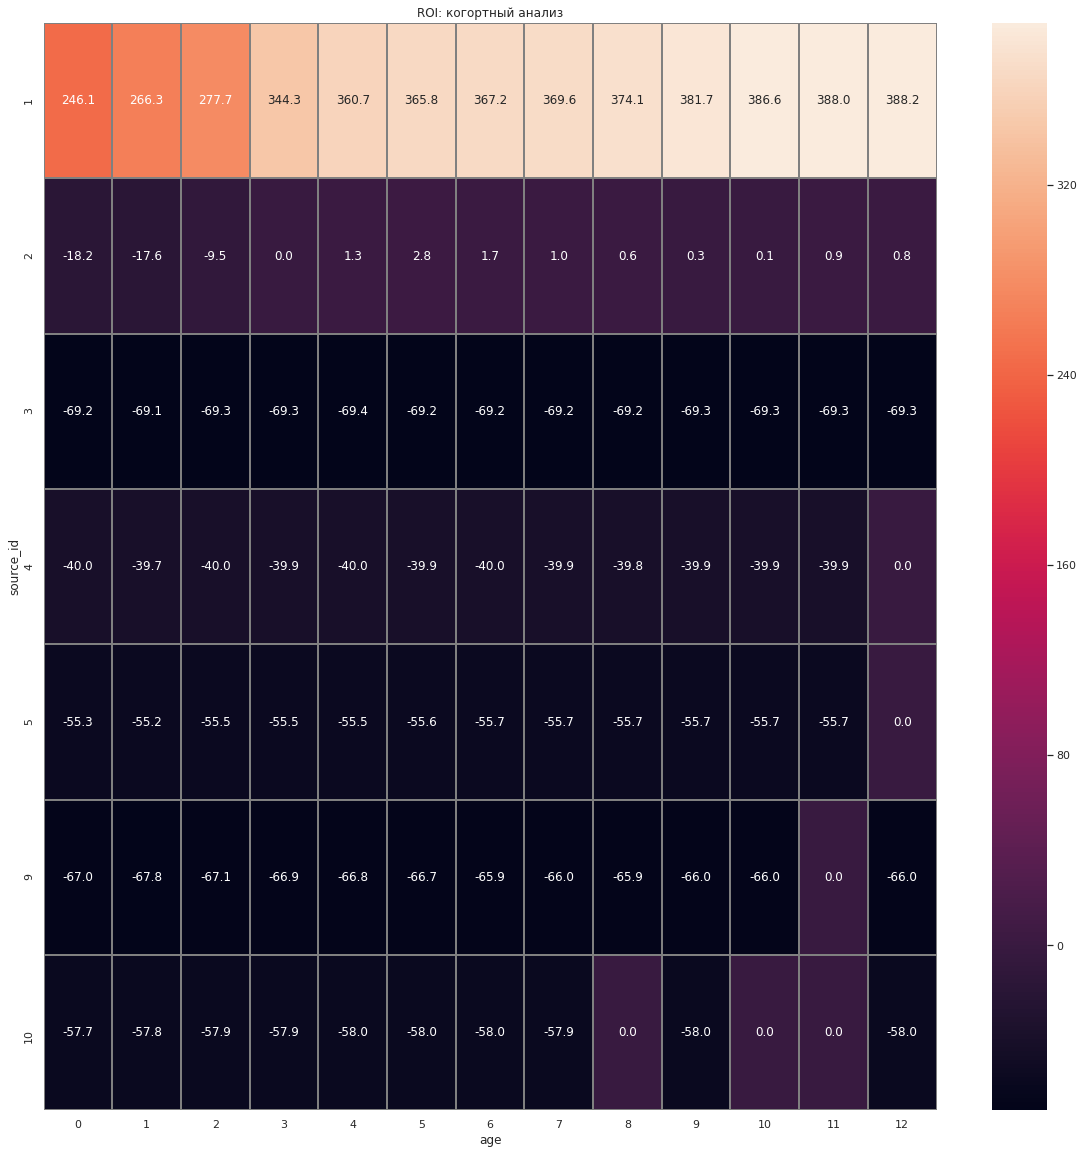

In [64]:

sns.set(style='white')
plt.figure(figsize=(20, 20))
plt.title('ROI: когортный анализ')
sns.heatmap(ROI, annot=True, fmt='', linewidths=1, linecolor='gray')

## Вывод:

    Таким образом, мы можем видеть, что даже в отдаленной перспективе затраты  на  маркетинг не окупают себя. Лишь источник трафика №1 показывает положительный ROI, поэтому рекомендуется использовать именно его!

# Общие выводы.

На основании проведенного исследования, рекомендуется:
1. Продолжить  использование маркетинговых источников 1, так как они гарантируют наибольший ROI - возврат инвестиций. Другие источники трафика показывают отрицательный ROI.

2. Рассмотреть целесообразность использование источника 3, так как ROI на порядки ниже, чем альтерантивы.

3. Проводить масштабные маркетинговые компании в декабре и июне, так как именно на эти периоды приходится наибольшая активность пользователей.

4. Разработать способы удержания клиентов и повысить Retantion Rate - лишь малое число пользователей совершают повторную покупку через 1 месяц  и в будущем.
